 2) Design a combinatorial bandit algorithm to optimize the budget allocation over the three subcampaigns
  to maximize the total number of clicks. Plot the cumulative regret.
prima si stimano le curve (budget allocato -> numero di click + rumore gaussiano)\n",
poi crea la tabella e si trova la combinazione migliore di sub per avere il massimo numero di click\n",


    CURVE\n",
    MAX_BUDGET * (1.0 - np.exp(-(PARAMETRO_SUB * x))\n",

    RUMORE: generazione sample con rumore\n",
    SAMPLE = np.random.normal(CLICK_Y_CURVA, VARIANZA_FISSA)\n",
    CLICK_Y_CURVA = valore del numero di click preso dalla curva dato un budget x\n",

   Dai vari SAMPLE si generano le  3 CURVA_GEN con un GP\n",

    Dalle curve si riempie la prima tabella con i valori di budget prefissati:
    0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

    Si applica l'optimization problem per decidere la combinazione migliore di subcampaign

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from project.Urbano08.BiddingEnvironment import BiddingEnvironment
from project.Urbano08.Learner import Learner

In [15]:
n_obs = 50
x_obs = np.array([])
y_obs = np.array([])

max_bid = 1
max_clicks = 100
n_arms = 11

noise_std = 3.0

bids = np.linspace(0, max_bid, n_arms)
print(bids)

env = BiddingEnvironment(bids,max_clicks,noise_std)
lern = Learner(n_arms,bids)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [16]:
for i in range(0, n_obs):

    pulled = lern.pull_arm()
    clicks = env.round(pulled,0,0)[0]
    lern.update(pulled, clicks)
    print(str(pulled) + "," + str(clicks))
    x_obs = np.append(x_obs,bids[pulled])
    y_obs = np.append(y_obs,clicks)

0,0.3011792085694973
3,67.30659746293647
8,98.76917976999523
5,89.84724097584812
4,75.58319103970625
10,97.55778719751329
10,104.93953806962213
10,95.99181403959658
10,100.41511783990109
9,98.44668874660972
2,50.036293454164415
6,92.61063953394282
6,86.7629046045993
8,98.68972721693697
7,89.88950411982768
9,100.73245644476445
8,102.01363267607286
9,99.4078650255015
8,97.75732448783536
10,96.48223288878276
10,100.50702808544136
10,96.9621020090595
7,91.24844802859145
9,92.28409643697981
10,102.32261525085195
7,95.43098674783346
8,93.69907704678342
8,94.31363350083227
10,97.23613032381446
10,99.34497498378005
9,100.88393332236643
10,99.9743451748711
10,95.00199198769684
9,98.46985890547569
10,98.63749172540709
10,93.60394088274307
9,90.28900825243844
7,93.01624901988542
6,93.08584742341749
10,99.33936841550111
10,100.00604941602028
9,97.78688331737995
10,94.25967726130827
9,99.74494438869847
7,96.84467645408135
10,96.84048170300625
5,84.93180784716115
8,94.68204501361545
9,96.05054396464

[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]]


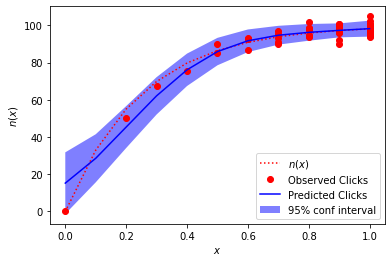

In [17]:
x_pred = np.atleast_2d(bids).T
X = np.atleast_2d(x_obs).T
Y = y_obs.ravel()
print(x_pred)
plt.figure()
plt.plot(x_pred, env.bid_sub1(x_pred), 'r:', label=r'$n(x)$')
plt.plot(X.ravel(), Y, 'ro', label=r'Observed Clicks')
plt.plot(x_pred, lern.means, 'b-', label=r'Predicted Clicks')
plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([lern.means - 1.96 * lern.sigmas, (lern.means + 1.96 * lern.sigmas)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% conf interval')
plt.xlabel('$x$')
plt.ylabel('$n(x)$')
plt.legend(loc='lower right')
plt.show()